In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Read in data
df = pd.read_csv('HPS_Week13_PUF_CSV/pulse2020_puf_13.csv')

# Pull out NJ specific data
nj_ind = 34
nj = df[df['EST_ST'] == nj_ind]

# Reset index
nj = nj.reset_index()

# Split data frame by children
kids = nj[nj['THHLD_NUMKID']>0]
no_kids = nj[nj['THHLD_NUMKID']==0]

In [39]:
# Get info on dataframe
print('number total households: ' + str(len(nj)))

# Get number households with children
print('number households with children: ' + str(len(nj[nj['THHLD_NUMKID']>0])))

# Child count
child_counts = nj['THHLD_NUMKID'].value_counts()
for numKids,count in enumerate(child_counts[1:], start=1):
    print('\t' + str(numKids) + ' kid(s): ' + str(count))


number total households: 2209
number households with children: 844
	1 kid(s): 378
	2 kid(s): 345
	3 kid(s): 94
	4 kid(s): 18
	5 kid(s): 9


In [227]:
# Demographics: race
race_key = ['white', 'black', 'asian', 'other']

print('Race & ethnicity of householder with children')
race_kid_count = kids['RRACE'].value_counts()
total_kids = sum(race_kid_count)
for ind,count in enumerate(race_kid_count):
    print('\t' + race_key[ind] + ': ' + str(count) + ' (' + str(round(count/total_kids*100,2)) + '%)')
print('\thispanic/latino: ' + str(kids['RHISPANIC'].value_counts()[2]) + '  (' +str(round(kids['RHISPANIC'].value_counts()[2]/total_kids,2)*100) + '%)')    
    
print('\nRace of householder without children')
race_no_kids_count = no_kids['RRACE'].value_counts()
total_no_kids = sum(race_no_kids_count)
for ind,count in enumerate(race_no_kids_count):
    print('\t' + race_key[ind] + ': ' + str(count) + ' (' + str(round(count/total_no_kids*100,2)) + '%)')
print('\thispanic/latino: ' + str(no_kids['RHISPANIC'].value_counts()[2]) + '  (' +str(round(no_kids['RHISPANIC'].value_counts()[2]/total_no_kids,2)*100) + '%)')   

Race & ethnicity of householder with children
	white: 611 (72.39%)
	black: 100 (11.85%)
	asian: 96 (11.37%)
	other: 37 (4.38%)
	hispanic/latino: 132  (16.0%)

Race of householder without children
	white: 1115 (81.68%)
	black: 114 (8.35%)
	asian: 99 (7.25%)
	other: 37 (2.71%)
	hispanic/latino: 120  (9.0%)


In [225]:
round(99/total_no_kids,2)*100

7.000000000000001

In [69]:
print('\thispanic/latino: ' + str(round(kids['RHISPANIC'].value_counts(normalize=True)[2],2)))

	hispanic/latino: 0.16


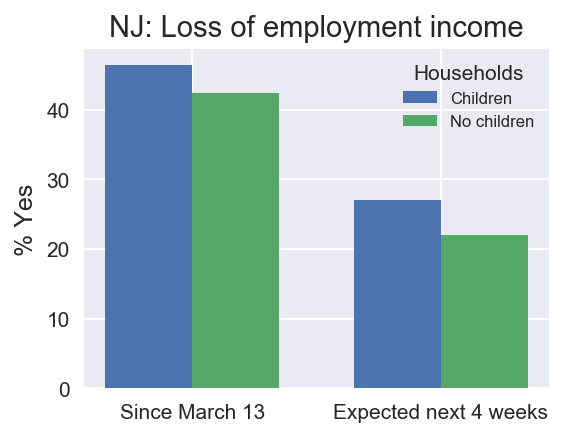

In [576]:
#Employment: loss of income

yes = 1
no = 2
dnr = -99

# Job loss since March 13, 2020
# Have you or anyone in household lost employment income
kids_jobloss = kids['WRKLOSS'].value_counts(normalize=True) * 100
no_kids_jobloss = no_kids['WRKLOSS'].value_counts(normalize=True) * 100

# Expected job loss in next 4 weeks
# Do you or anyone in your household expect lost employment income in next 4 weeks?
kids_exploss = kids['EXPCTLOSS'].value_counts(normalize=True) * 100
no_kids_exploss = no_kids['EXPCTLOSS'].value_counts(normalize=True) * 100

# Plot
x = np.arange(2)
width = .35

fig, ax = plt.subplots(figsize=(4,3), dpi = 150);
ax.bar(x, [kids_jobloss[yes], kids_exploss[yes]], width=width);
ax.bar(x+width, [no_kids_jobloss[yes], no_kids_exploss[yes]], width=width)

ax.set_xticks(x+width/2)
ax.set_xticklabels(['Since March 13', 'Expected next 4 weeks'], fontsize=10)
ax.set_ylabel('% Yes', fontsize=12)
ax.set_title('NJ: Loss of employment income', fontsize=14)
plt.yticks(fontsize=10)

lg = plt.legend(['Children', 'No children'], title='Households', fontsize=8)
lg.get_title().set_fontsize(10)
plt.show()

fig.savefig('figures/loss_employment_income.png', dpi=300)


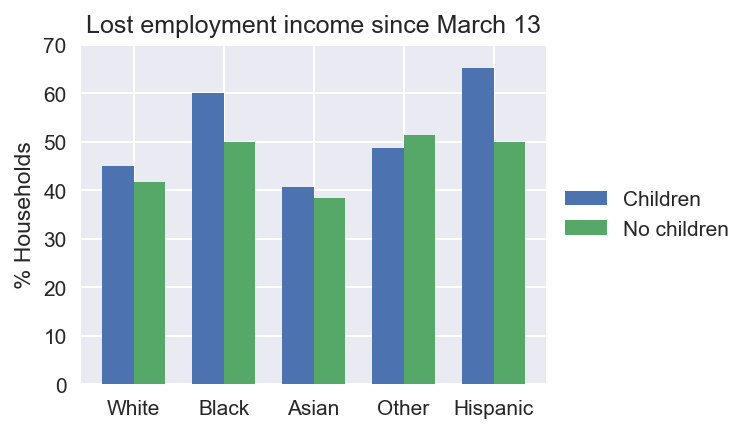

In [610]:
# Loss of employment income by race
#pd.crosstab(index=df_tips['day'], columns=df_tips['sex'])

kids_jobloss_race = pd.crosstab(index=kids['WRKLOSS'], columns=kids['RRACE'], normalize='columns')*100
kids_jobloss_race = kids_jobloss_race.rename(columns={1:'white', 2:'black', 3:'asian', 4:'other'}, 
                                             index={1:'yes', 2:'no', -99:'no response'})

kids_jobloss_eth = pd.crosstab(index=kids['WRKLOSS'], columns=kids['RHISPANIC'], normalize='columns')*100
kids_jobloss_eth = kids_jobloss_eth.rename(columns={1:'no', 2:'yes'}, 
                                           index={1:'yes', 2:'no', -99:'no response'})


no_kids_jobloss_race = pd.crosstab(index=no_kids['WRKLOSS'], columns=no_kids['RRACE'], normalize='columns')*100
no_kids_jobloss_race = no_kids_jobloss_race.rename(columns={1:'white', 2:'black', 3:'asian', 4:'other'}, 
                                             index={1:'yes', 2:'no', -99:'no response'})

no_kids_jobloss_eth = pd.crosstab(index=no_kids['WRKLOSS'], columns=no_kids['RHISPANIC'], normalize='columns')*100
no_kids_jobloss_eth = no_kids_jobloss_eth.rename(columns={1:'no', 2:'yes'}, 
                                           index={1:'yes', 2:'no', -99:'no response'})


# Plot: race
fig, ax = plt.subplots(figsize=(4,3), dpi = 150);
x = np.arange(5)
width = 0.35


kids_jobloss_race['hisp'] = kids_jobloss_eth['yes']
no_kids_jobloss_race['hisp'] = no_kids_jobloss_eth['yes']

ax.bar(x, kids_jobloss_race.loc['yes'], width=width)
ax.bar(x+width, no_kids_jobloss_race.loc['yes'], width=width)

ax.set_xticks(x+width/2)
ax.set_xticklabels(['White', 'Black', 'Asian', 'Other', 'Hispanic'])
ax.set_ylabel('% Households')
ax.set_ylim(0,70)

lg = plt.legend(['Children', 'No children'],loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Lost employment income since March 13')
plt.show()

fig.savefig('figures/loss_employment_income_race.png', dpi=300, bbox_extra_artists=(lg,), bbox_inches='tight')


# # Plot: ethnicity
# fig, ax = plt.subplots(figsize=(4,3), dpi = 150);
# x = np.arange(2)
# width = 0.35

# ax.bar(x, kids_jobloss_eth.loc['yes'], width=width)
# ax.bar(x+width, no_kids_jobloss_eth.loc['yes'], width=width)

# ax.set_xticks(x+width/2)
# ax.set_xticklabels(['Not Hispanic or Latino', 'Hispanic or Latino'])
# ax.set_ylabel('% Households')

# plt.legend(['Children', 'No children'])
# plt.title('Loss of employment income since March 13')
# plt.show()


In [601]:
kids_jobloss_race.loc['yes']

RRACE
white    45.008183
black    60.000000
asian    40.625000
other    48.648649
hisp     65.151515
Name: yes, dtype: float64

In [588]:

kids_jobloss_race['hisp'] = kids_jobloss_eth['yes']
kids_jobloss_race

RRACE,white,black,asian,other,hisp
WRKLOSS,,,,,
no response,0.327332,0.0,0.000,2.702703,0.757576
yes,45.008183,60.0,40.625,48.648649,65.151515
no,54.664484,40.0,59.375,48.648649,34.090909


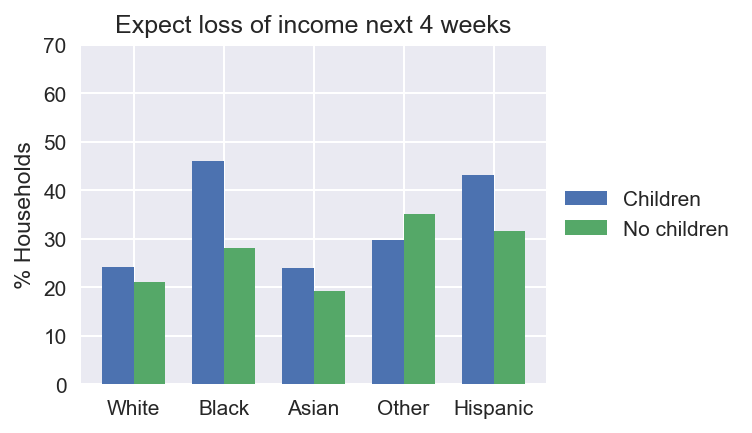

In [611]:
# Loss of employment income by race
#pd.crosstab(index=df_tips['day'], columns=df_tips['sex'])

kids_exploss_race = pd.crosstab(index=kids['EXPCTLOSS'], columns=kids['RRACE'], normalize='columns') * 100
kids_exploss_race = kids_exploss_race.rename(columns={1:'white', 2:'black', 3:'asian', 4:'other'}, 
                                             index={1:'yes', 2:'no', -99:'no response'})

kids_exploss_eth = pd.crosstab(index=kids['EXPCTLOSS'], columns=kids['RHISPANIC'], normalize='columns') * 100
kids_exploss_eth = kids_exploss_eth.rename(columns={1:'no', 2:'yes'}, 
                                           index={1:'yes', 2:'no', -99:'no response'})


no_kids_exploss_race = pd.crosstab(index=no_kids['EXPCTLOSS'], columns=no_kids['RRACE'], normalize='columns') * 100
no_kids_exploss_race = no_kids_exploss_race.rename(columns={1:'white', 2:'black', 3:'asian', 4:'other'}, 
                                             index={1:'yes', 2:'no', -99:'no response'})

no_kids_exploss_eth = pd.crosstab(index=no_kids['EXPCTLOSS'], columns=no_kids['RHISPANIC'], normalize='columns') * 100
no_kids_exploss_eth = no_kids_exploss_eth.rename(columns={1:'no', 2:'yes'}, 
                                           index={1:'yes', 2:'no', -99:'no response'})



# Plot: race

kids_exploss_race['hisp'] = kids_exploss_eth['yes']
no_kids_exploss_race['hisp'] = no_kids_exploss_eth['yes']

fig, ax = plt.subplots(figsize=(4,3), dpi = 150);
x = np.arange(5)
width = 0.35

ax.bar(x, kids_exploss_race.loc['yes'], width=width)
ax.bar(x+width, no_kids_exploss_race.loc['yes'], width=width)

ax.set_xticks(x+width/2)
ax.set_xticklabels(['White', 'Black', 'Asian', 'Other', 'Hispanic'])
ax.set_ylim([0,70])
ax.set_ylabel('% Households')

lg = plt.legend(['Children', 'No children'], loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Expect loss of income next 4 weeks')
plt.show()

fig.savefig('figures/expect_loss_income_race.png', dpi=300, bbox_extra_artists=(lg,), bbox_inches='tight')

# # Plot: ethnicity
# fig, ax = plt.subplots(figsize=(4,3), dpi = 150);
# x = np.arange(2)
# width = 0.35

# ax.bar(x, kids_jobloss_eth.loc['yes'], width=width)
# ax.bar(x+width, no_kids_jobloss_eth.loc['yes'], width=width)

# ax.set_xticks(x+width/2)
# ax.set_xticklabels(['Not Hispanic or Latino', 'Hispanic or Latino'])
# ax.set_ylabel('% Households')

# plt.legend(['Children', 'No children'])
# plt.title('Expected loss of income next 4 weeks')
# plt.show()


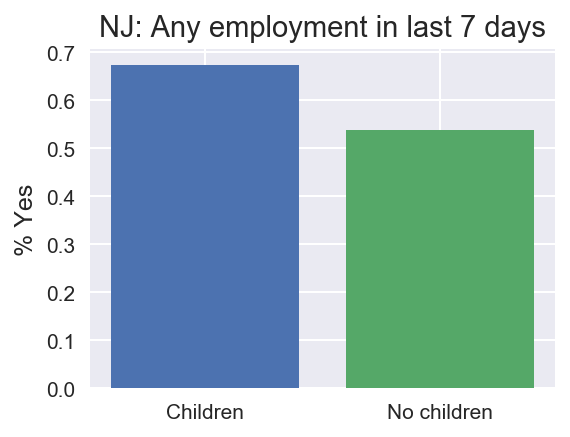

Reasons for not working among families with kids


did not report                                                  571
other reason                                                     71
caring for children not in school/daycare                        41
retired                                                          34
laid off due to coronavirus                                      30
employer experienced reduction in business do to coronavirus     26
employer closed temporarily due to coronavirus                   17
concerned about getting or spreading coronavirus                 12
otherwise sick or disabled                                       12
did not want employment                                          11
caring for elderly person                                         7
seen but not selected                                             5
sick with coronavirus                                             4
employer closed permanently due to coronavirus                    3
Name: RSNNOWRK, dtype: int64

In [197]:
# Employment: employment and reasons for non-employment

# Were you employed in last 7 days?
kids_employed = kids['ANYWORK'].value_counts(normalize=True)
no_kids_employed = no_kids['ANYWORK'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(4,3), dpi = 150);
ax.bar(1, kids_employed[yes])
ax.bar(2, no_kids_employed[yes])
ax.set_xticks([1,2])
ax.set_xticklabels(['Children', 'No children'], fontsize=10)
ax.set_ylabel('% Yes', fontsize=12)
ax.set_title('NJ: Any employment in last 7 days', fontsize=14)

plt.yticks(fontsize=10)
plt.show()

# Reasons for not being employed
print('Reasons for not working among families with kids')
kids_unemp_reasons = kids['RSNNOWRK'].value_counts().rename(index={-88:'no response',
                                                                   1:'did not want employment',
                                                                   2: 'sick with coronavirus',
                                                                   3: 'caring for someone with coronavirus',
                                                                   4: 'caring for children not in school/daycare',
                                                                   5: 'caring for elderly person',
                                                                   6: 'otherwise sick or disabled',
                                                                   7: 'retired',
                                                                   8: 'employer experienced reduction in business do to coronavirus',
                                                                   9: 'laid off due to coronavirus',
                                                                   10: 'employer closed temporarily due to coronavirus', 
                                                                   11: 'employer closed permanently due to coronavirus',
                                                                   12: 'other reason', 
                                                                   13: 'concerned about getting or spreading coronavirus', 
                                                                   -99: 'seen but not selected',
                                                                   -88: 'did not report'
                                                                  })
kids_unemp_reasons


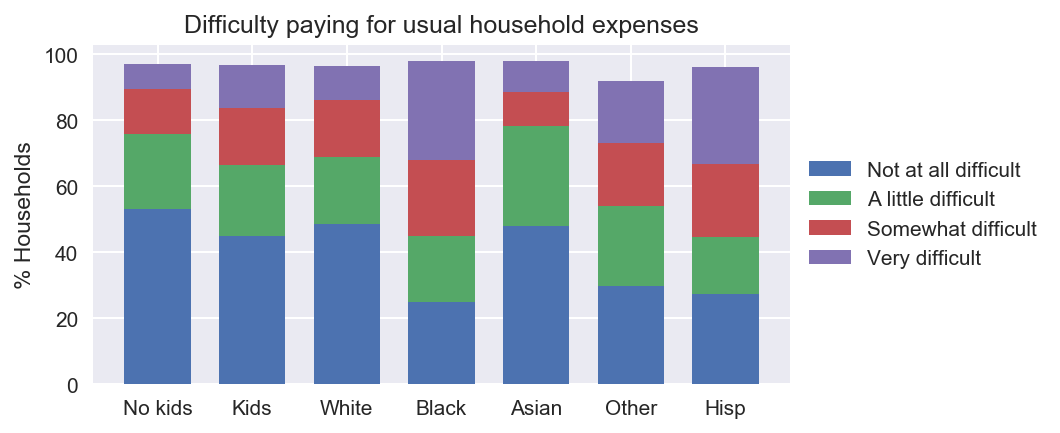

In [615]:
# Difficulty with expenses
kids_exp_diff = kids['EXPNS_DIF'].value_counts(normalize=True)
no_kids_exp_diff = no_kids['EXPNS_DIF'].value_counts(normalize=True)


exp_diff = pd.concat([no_kids_exp_diff.rename('No kids'), kids_exp_diff.rename('Kids')], axis=1)

exp_diff_race = pd.crosstab(index=kids['EXPNS_DIF'], 
                            columns=kids['RRACE'],
                            normalize='columns'
                           ).rename(columns={1:'White', 2:'Black', 3:'Asian', 4:'Other'})

exp_diff_hisp = pd.crosstab(index=kids['EXPNS_DIF'],
                           columns=kids['RHISPANIC'],
                           normalize='columns')[2].rename('Hisp')

exp_diff = pd.concat([exp_diff, exp_diff_race, exp_diff_hisp], axis=1)*100

#get cumulative proprotion reporting difficult
exp_cum_diff = exp_diff.loc[1:4].cumsum()

# Plot as stacked bar
fig,ax = plt.subplots(figsize=(6,3), dpi=150)

x = np.arange(7)
width = .7
for i in range(1,5):
    if i == 1:
        ax.bar(x, exp_diff.loc[i], width=width)
    else:
        ax.bar(x, exp_diff.loc[i], bottom=exp_cum_diff.loc[i-1], width=width)

ax.set_xticks(x)
ax.set_xticklabels(exp_diff.columns.values)
ax.set_ylabel('% Households')
ax.set_title('Difficulty paying for usual household expenses')
lg = plt.legend(['Not at all difficult', 'A little difficult', 'Somewhat difficult', 'Very difficult'], 
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

fig.savefig('figures/diff_paying_expenses.png', dpi=300, bbox_extra_artist=(lg,), bbox_inches='tight')

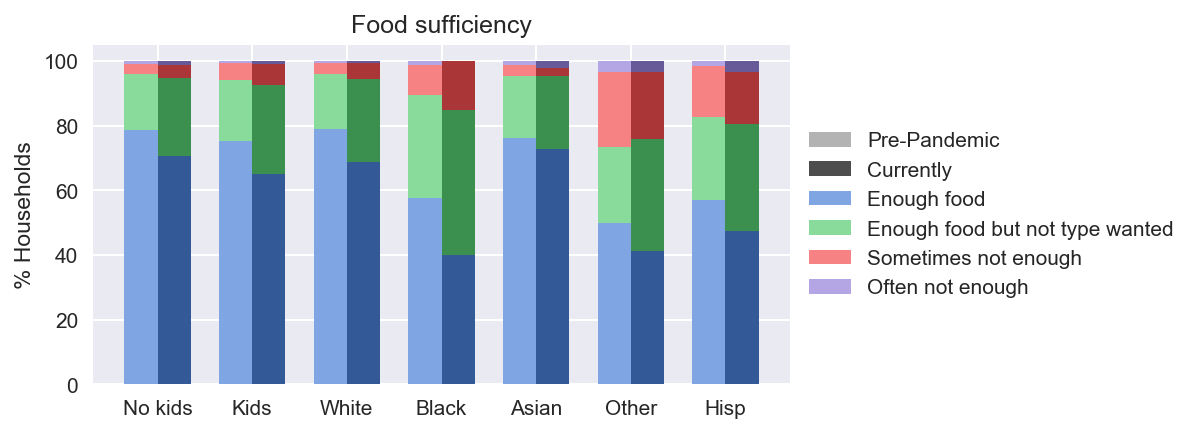

In [616]:
###### Food sufficiency

# Get data for kids vs no kids
no_kids_food = no_kids[['PRIFOODSUF', 'CURFOODSUF']].apply(pd.Series.value_counts)
kids_food = kids[['PRIFOODSUF', 'CURFOODSUF']].apply(pd.Series.value_counts)


# Break down kids by race
kids_food_pre_race = pd.crosstab(index=kids['PRIFOODSUF'], columns=kids['RRACE'], 
                                ).rename(columns={1:'White', 2:'Black', 3:'Asian', 4:'Other'})
kids_food_cur_race = pd.crosstab(index=kids['CURFOODSUF'], columns=kids['RRACE'], 
                                ).rename(columns={1:'White', 2:'Black', 3:'Asian', 4:'Other'})

# Break down kids by ethnicity
kids_food_pre_hisp = pd.crosstab(index=kids['PRIFOODSUF'],
                           columns=kids['RHISPANIC'])[2].rename('Hisp')
kids_food_cur_hisp = pd.crosstab(index=kids['CURFOODSUF'],
                           columns=kids['RHISPANIC'])[2].rename('Hisp')

# Concat data, drop missing values, and divide by total
food_pre = pd.concat([no_kids_food['PRIFOODSUF'].rename('No kids'), kids_food['PRIFOODSUF'].rename('Kids'), kids_food_pre_race, kids_food_pre_hisp], axis=1)
food_pre = food_pre.drop([-99,-88])
food_pre = food_pre / food_pre.sum()*100

food_cur = pd.concat([no_kids_food['CURFOODSUF'].rename('No kids'), kids_food['CURFOODSUF'].rename('Kids'), kids_food_cur_race, kids_food_cur_hisp], axis=1)
food_cur = food_cur.drop([-99,-88])
food_cur = food_cur / food_cur.sum()*100

food_pre_cum = food_pre.loc[1:4].cumsum()
food_cur_cum = food_cur.loc[1:4].cumsum()


# Plot
fig,ax = plt.subplots(figsize=(6,3), dpi=150)
width = .35
x = np.arange(7)

alpha = .5
cur_bar_colors = np.array([[76, 114, 176], [85, 168, 104], [196, 79, 81], [129, 115,178]])/255 - .1
pre_bar_colors = cur_bar_colors + .3

# for legend
ax.bar(1,.01, width=.1, color=[.7, .7, .7])
ax.bar(1,.01, width=.1, color=[.3, .3, .3])

for i in range(1,5):
    if i == 1:
        ax.bar(x, food_pre.loc[i], width=width, color=pre_bar_colors[i-1])
    else:
        ax.bar(x, food_pre.loc[i], bottom=food_pre_cum.loc[i-1], width=width, color=pre_bar_colors[i-1])
        
for i in range(1,5):
    if i == 1:
        ax.bar(x+width, food_cur.loc[i], width=width, color=cur_bar_colors[i-1])
    else:
        ax.bar(x+width, food_cur.loc[i], bottom=food_cur_cum.loc[i-1], width=width, color=cur_bar_colors[i-1])
        
        
ax.set_xticks(x + width/2)
ax.set_xticklabels(exp_diff.columns.values)
ax.set_ylabel('% Households')
ax.set_title('Food sufficiency')
ax.set_ylim([0,105])
lg = plt.legend(['Pre-Pandemic', 'Currently', 'Enough food', 'Enough food but not type wanted', 'Sometimes not enough', 'Often not enough'], 
           loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))        
plt.show()

fig.savefig('figures/food_sufficiency.png', dpi=300, bbox_extra_actors=(lg,), bbox_inches='tight')

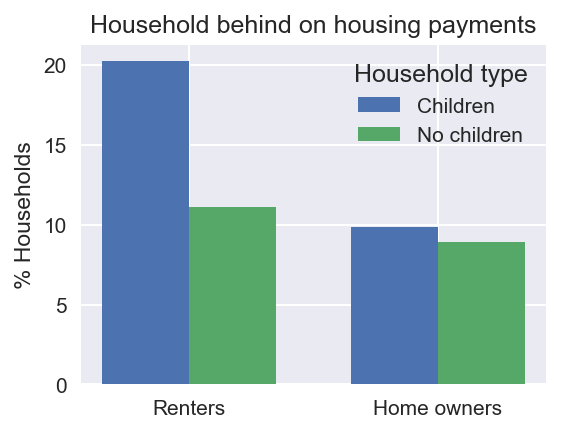

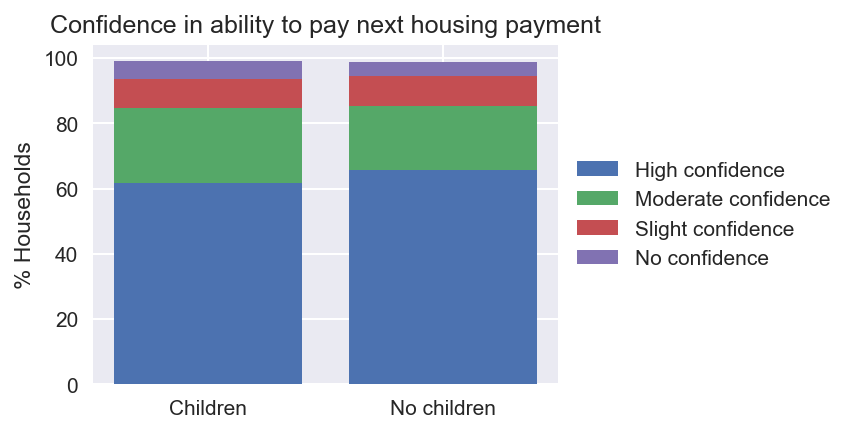

In [622]:
# Housing security

kids_housing = kids[['RENTCUR', 'MORTCUR', 'MORTCONF']].apply(pd.Series.value_counts)
no_kids_housing = no_kids[['RENTCUR', 'MORTCUR', 'MORTCONF']].apply(pd.Series.value_counts)

# drop non responses
kids_housing = kids_housing.drop([-88,-99])
no_kids_housing = no_kids_housing.drop([-88,-99])

# normalize by total
kids_housing = kids_housing / kids_housing.sum() * 100
no_kids_housing = no_kids_housing / no_kids_housing.sum() *100


# Plot: housing payment current
fig, ax = plt.subplots(figsize=(4,3), dpi=150)
x = np.arange(2)
width = .35

ax.bar(x, kids_housing.loc[2][['RENTCUR', 'MORTCUR']], width=width);
ax.bar(x+width, no_kids_housing.loc[2][['RENTCUR', 'MORTCUR']], width=width)

ax.set_xticks(x + width/2)
ax.set_xticklabels(['Renters', 'Home owners'])
ax.set_ylabel('% Households')
ax.set_title('Household behind on housing payments')

lg = plt.legend(['Children', 'No children'])
lg.set_title('Household type')
plt.show()
fig.savefig('figures/behind_housing_payments.png', dpi=300, bbox_extra_artists=(lg,), bbox_inches='tight')

# Plot: confidence in next month's housing payment
kids_housing_conf = kids_housing['MORTCONF'].rename(index={1:4, 2:3, 3:2, 4:1}).reindex([1,2,3,4,5])
no_kids_housing_conf = no_kids_housing['MORTCONF'].rename(index={1:4, 2:3, 3:2, 4:1}).reindex([1,2,3,4,5])

kids_housing_cum = kids_housing_conf.cumsum()
no_kids_housing_cum = no_kids_housing_conf.cumsum()

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
for i in range(1,5):
    if i == 1:
        ax.bar(x, [kids_housing_conf.loc[i], no_kids_housing_conf.loc[i]])
    else:
        ax.bar(x, [kids_housing_conf.loc[i], no_kids_housing_conf.loc[i]], 
              bottom = [kids_housing_cum[i-1], no_kids_housing_cum[i-1]])

ax.set_xticks(x)
ax.set_xticklabels(['Children', 'No children'])
ax.set_title('Confidence in ability to pay next housing payment')
ax.set_ylabel('% Households')

lg = plt.legend(['High confidence', 'Moderate confidence', 'Slight confidence', 'No confidence'], 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()
fig.savefig('figures/conf_next_housing_payments.png', dpi=300, bbox_extra_artists=(lg,), bbox_inches='tight')
